In [7]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import datetime
import plotly as pt
import plotly.graph_objects as go
from plotly.offline import iplot
from scipy import signal
import pytz
import seaborn as sns

In [54]:
df_60s = pd.read_pickle('../../../Data/2023_03_09_spiekeroog/Geolore/Total_data_untill_20230309.pkl')

In [55]:
wind = pd.read_csv('../../../Data/2023_03_27_norderney_weather_dwd/produkt_zehn_min_ff_20210923_20230326_03631.txt'
            , sep=';', parse_dates=[1])

perci = pd.read_csv('../../../Data/2023_03_27_norderney_weather_dwd/produkt_zehn_min_rr_20210923_20230326_03631.txt'
            , sep=';', parse_dates=[1])


solar = pd.read_csv('../../../Data/2023_03_27_norderney_weather_dwd/produkt_zehn_min_sd_20210923_20230326_03631.txt'
            , sep=';', parse_dates=[1])

temp = pd.read_csv('../../../Data/2023_03_27_norderney_weather_dwd/produkt_zehn_min_tu_20210923_20230326_03631.txt'
            , sep=';', parse_dates=[1])

data_weather = pd.merge(pd.merge(pd.merge(temp, perci), wind), solar)
data_weather['MESS_DATUM'] = pd.to_datetime(data_weather['MESS_DATUM'], utc = pytz.timezone("Europe/Berlin"))
data_weather.set_index('MESS_DATUM', inplace=True)
data_weather

STATIONS_ID    QN   PP_10  TT_10  TM5_10  RF_10  \
MESS_DATUM                                                                   
2021-09-23 00:00:00+00:00         3631     3  1017.6   15.7    14.6   86.5   
2021-09-23 00:10:00+00:00         3631     3  1017.4   15.6    14.7   85.4   
2021-09-23 00:20:00+00:00         3631     3  1017.1   15.5    14.4   85.9   
2021-09-23 00:30:00+00:00         3631     3  1016.9   15.6    14.6   85.7   
2021-09-23 00:40:00+00:00         3631     3  1016.8   15.6    14.6   85.9   
...                                ...   ...     ...    ...     ...    ...   
2023-03-26 23:10:00+00:00         3631     2  1009.7    5.6     4.4   62.9   
2023-03-26 23:20:00+00:00         3631     2  1009.8    5.5     4.5   64.4   
2023-03-26 23:30:00+00:00         3631     2  1009.9    5.5     4.4   63.5   
2023-03-26 23:40:00+00:00         3631     2  1010.1    4.8     3.6   75.8   
2023-03-26 23:50:00+00:00         3631     2  1010.3    4.8     3.6   76.1   

                           TD_10  eor  RWS_DAU_10  RWS_10  RWS_IND_10  FF_10  \
MESS_DATUM                                                                     
2021-09-23 00:00:00+00:00   13.5  eor           0     0.0           0    7.0   
2021-09-23 00:10:00+00:00   13.2  eor           0     0.0           0    7.4   
2021-09-23 00:20:00+00:00   13.2  eor           0     0.0           0    7.2   
2021-09-23 00:30:00+00:00   13.2  eor           0     0.0           0    7.3   
2021-09-23 00:40:00+00:00   13.3  eor           0     0.0           0    7.3   
...                          ...  ...         ...     ...         ...    ...   
2023-03-26 23:10:00+00:00   -0.9  eor           0     0.0           0   10.7   
2023-03-26 23:20:00+00:00   -0.7  eor           0     0.0           0   11.9   
2023-03-26 23:30:00+00:00   -0.9  eor           0     0.0           0   12.7   
2023-03-26 23:40:00+00:00    0.9  eor           0     0.0           0   11.4   
2023-03-26 23:50:00+00:00    1.0  eor           0     0.0           0   10.1   

                           DD_10  DS_10  GS_10  SD_10  LS_10  
MESS_DATUM                                                    
2021-09-23 00:00:00+00:00    220    0.0    0.0    0.0   -999  
2021-09-23 00:10:00+00:00    220    0.0    0.0    0.0   -999  
2021-09-23 00:20:00+00:00    220    0.0    0.0    0.0   -999  
2021-09-23 00:30:00+00:00    220    0.0    0.0    0.0   -999  
2021-09-23 00:40:00+00:00    220    0.0    0.0    0.0   -999  
...                          ...    ...    ...    ...    ...  
2023-03-26 23:10:00+00:00    340 -999.0    0.0    0.0   -999  
2023-03-26 23:20:00+00:00    330 -999.0    0.0    0.0   -999  
2023-03-26 23:30:00+00:00    330 -999.0    0.0    0.0   -999  
2023-03-26 23:40:00+00:00    350 -999.0    0.0    0.0   -999  
2023-03-26 23:50:00+00:00    340 -999.0    0.0    0.0   -999  

[79200 rows x 17 columns]

In [56]:
para_labels = ["Langeoog","Spiekeroog","Wangerooge_North","Wangerooge_West"]
data_path = '../../../Data/2023_03_28_sealevels/'
directory_labels = ["Langeoog-W1.zrx","Spiekeroog-W1.zrx", "Wangerooge-Nord-W1.zrx", "Wangerooge-West-W1.zrx"]


for i in range(4):
    
    locals()[para_labels[i]] = Langeoog = pd.read_csv(data_path+directory_labels[i], skiprows=6, 
                                                      sep="\s+", parse_dates=[0], header=None)
    locals()[para_labels[i]][0] = pd.to_datetime(locals()[para_labels[i]][0], 
                                                           utc = pytz.timezone("Europe/Berlin"))
    locals()[para_labels[i]].rename(columns={0:"Date_Time", 1:"W_cm"}, inplace=True)
    locals()[para_labels[i]].set_index('Date_Time', inplace=True)
    
Langeoog

W_cm
Date_Time                      
2022-10-01 00:00:00+00:00   524
2022-10-01 00:01:00+00:00   526
2022-10-01 00:02:00+00:00   525
2022-10-01 00:03:00+00:00   527
2022-10-01 00:04:00+00:00   527
...                         ...
2023-03-27 23:56:00+00:00   483
2023-03-27 23:57:00+00:00   483
2023-03-27 23:58:00+00:00   486
2023-03-27 23:59:00+00:00   486
2023-03-28 00:00:00+00:00   488

[256321 rows x 1 columns]

In [62]:
custom_date_parser = lambda x: datetime.datetime.strptime(x, "%Y%m%d%H")


soil = pd.read_csv('../../../Data/2023_03_27_norderney_weather_dwd/bodentemp/produkt_eb_stunde_20211023_20230425_03631.txt'
            , sep=';', parse_dates=[1], date_parser=custom_date_parser)

soil['MESS_DATUM'] = pd.to_datetime(soil['MESS_DATUM'], utc = pytz.timezone("Europe/Berlin"))
soil.set_index('MESS_DATUM', inplace=True)
soil

STATIONS_ID  QN_2  V_TE002  V_TE005  V_TE010  \
MESS_DATUM                                                                
2021-10-23 00:00:00+00:00         3631     3     -999      7.7      8.2   
2021-10-23 01:00:00+00:00         3631     3     -999      7.6      8.1   
2021-10-23 02:00:00+00:00         3631     3     -999      7.8      8.2   
2021-10-23 03:00:00+00:00         3631     3     -999      7.8      8.2   
2021-10-23 04:00:00+00:00         3631     3     -999      7.7      8.1   
...                                ...   ...      ...      ...      ...   
2023-04-25 19:00:00+00:00         3631     1     -999      8.0      9.2   
2023-04-25 20:00:00+00:00         3631     1     -999      7.0      8.3   
2023-04-25 21:00:00+00:00         3631     1     -999      6.5      7.7   
2023-04-25 22:00:00+00:00         3631     1     -999      6.2      7.3   
2023-04-25 23:00:00+00:00         3631     1     -999      6.0      7.0   

                           V_TE020  V_TE050  V_TE100  eor  
MESS_DATUM                                                 
2021-10-23 00:00:00+00:00      9.1     11.3     13.3  eor  
2021-10-23 01:00:00+00:00      9.1     11.2     13.3  eor  
2021-10-23 02:00:00+00:00      9.0     11.2     13.3  eor  
2021-10-23 03:00:00+00:00      9.0     11.2     13.3  eor  
2021-10-23 04:00:00+00:00      9.0     11.1     13.3  eor  
...                            ...      ...      ...  ...  
2023-04-25 19:00:00+00:00     10.4     10.3     10.4  eor  
2023-04-25 20:00:00+00:00      9.9     10.3     10.4  eor  
2023-04-25 21:00:00+00:00      9.4     10.3     10.4  eor  
2023-04-25 22:00:00+00:00      9.0     10.3     10.3  eor  
2023-04-25 23:00:00+00:00      8.6     10.3     10.3  eor  

[13200 rows x 9 columns]

In [94]:
total_merged_data__ = data_weather.join(Langeoog, how='outer') #, how='outer', left_index=False, right_index=False)
total_merged_data_ = total_merged_data__.join(soil, how='outer', rsuffix='_soil')
total_merged_data = total_merged_data_.join(df_60s, how='outer')
total_merged_data.replace(-999, np.NaN, inplace=True)
total_merged_data

STATIONS_ID    QN   PP_10  TT_10  TM5_10  RF_10  \
2021-09-23 00:00:00+00:00       3631.0   3.0  1017.6   15.7    14.6   86.5   
2021-09-23 00:10:00+00:00       3631.0   3.0  1017.4   15.6    14.7   85.4   
2021-09-23 00:20:00+00:00       3631.0   3.0  1017.1   15.5    14.4   85.9   
2021-09-23 00:30:00+00:00       3631.0   3.0  1016.9   15.6    14.6   85.7   
2021-09-23 00:40:00+00:00       3631.0   3.0  1016.8   15.6    14.6   85.9   
...                                ...   ...     ...    ...     ...    ...   
2023-04-25 19:00:00+00:00          NaN   NaN     NaN    NaN     NaN    NaN   
2023-04-25 20:00:00+00:00          NaN   NaN     NaN    NaN     NaN    NaN   
2023-04-25 21:00:00+00:00          NaN   NaN     NaN    NaN     NaN    NaN   
2023-04-25 22:00:00+00:00          NaN   NaN     NaN    NaN     NaN    NaN   
2023-04-25 23:00:00+00:00          NaN   NaN     NaN    NaN     NaN    NaN   

                           TD_10  eor  RWS_DAU_10  RWS_10  ...  V_TE002  \
2021-09-23 00:00:00+00:00   13.5  eor         0.0     0.0  ...      NaN   
2021-09-23 00:10:00+00:00   13.2  eor         0.0     0.0  ...      NaN   
2021-09-23 00:20:00+00:00   13.2  eor         0.0     0.0  ...      NaN   
2021-09-23 00:30:00+00:00   13.2  eor         0.0     0.0  ...      NaN   
2021-09-23 00:40:00+00:00   13.3  eor         0.0     0.0  ...      NaN   
...                          ...  ...         ...     ...  ...      ...   
2023-04-25 19:00:00+00:00    NaN  NaN         NaN     NaN  ...      NaN   
2023-04-25 20:00:00+00:00    NaN  NaN         NaN     NaN  ...      NaN   
2023-04-25 21:00:00+00:00    NaN  NaN         NaN     NaN  ...      NaN   
2023-04-25 22:00:00+00:00    NaN  NaN         NaN     NaN  ...      NaN   
2023-04-25 23:00:00+00:00    NaN  NaN         NaN     NaN  ...      NaN   

                           V_TE005  V_TE010  V_TE020  V_TE050  V_TE100  \
2021-09-23 00:00:00+00:00      NaN      NaN      NaN      NaN      NaN   
2021-09-23 00:10:00+00:00      NaN      NaN      NaN      NaN      NaN   
2021-09-23 00:20:00+00:00      NaN      NaN      NaN      NaN      NaN   
2021-09-23 00:30:00+00:00      NaN      NaN      NaN      NaN      NaN   
2021-09-23 00:40:00+00:00      NaN      NaN      NaN      NaN      NaN   
...                            ...      ...      ...      ...      ...   
2023-04-25 19:00:00+00:00      8.0      9.2     10.4     10.3     10.4   
2023-04-25 20:00:00+00:00      7.0      8.3      9.9     10.3     10.4   
2023-04-25 21:00:00+00:00      6.5      7.7      9.4     10.3     10.4   
2023-04-25 22:00:00+00:00      6.2      7.3      9.0     10.3     10.3   
2023-04-25 23:00:00+00:00      6.0      7.0      8.6     10.3     10.3   

                           eor_soil   0   1   2  
2021-09-23 00:00:00+00:00       NaN NaN NaN NaN  
2021-09-23 00:10:00+00:00       NaN NaN NaN NaN  
2021-09-23 00:20:00+00:00       NaN NaN NaN NaN  
2021-09-23 00:30:00+00:00       NaN NaN NaN NaN  
2021-09-23 00:40:00+00:00       NaN NaN NaN NaN  
...                             ...  ..  ..  ..  
2023-04-25 19:00:00+00:00       eor NaN NaN NaN  
2023-04-25 20:00:00+00:00       eor NaN NaN NaN  
2023-04-25 21:00:00+00:00       eor NaN NaN NaN  
2023-04-25 22:00:00+00:00       eor NaN NaN NaN  
2023-04-25 23:00:00+00:00       eor NaN NaN NaN  

[377509 rows x 30 columns]

In [95]:
total_merged_data.columns

Index([     'STATIONS_ID',             '  QN',            'PP_10',
                  'TT_10',           'TM5_10',            'RF_10',
                  'TD_10',              'eor',       'RWS_DAU_10',
                 'RWS_10',       'RWS_IND_10',            'FF_10',
                  'DD_10',            'DS_10',            'GS_10',
                  'SD_10',            'LS_10',             'W_cm',
       'STATIONS_ID_soil',             'QN_2',          'V_TE002',
                'V_TE005',          'V_TE010',          'V_TE020',
                'V_TE050',          'V_TE100',         'eor_soil',
                        0,                  1,                  2],
      dtype='object')

In [96]:
total_merged_data.drop(columns=['STATIONS_ID', 'LS_10', '  QN', 'eor', 'STATIONS_ID_soil', 'V_TE002' , 'QN_2', 'eor_soil'],
                       inplace=True)

In [97]:
total_merged_data.columns

Index([     'PP_10',      'TT_10',     'TM5_10',      'RF_10',      'TD_10',
       'RWS_DAU_10',     'RWS_10', 'RWS_IND_10',      'FF_10',      'DD_10',
            'DS_10',      'GS_10',      'SD_10',       'W_cm',    'V_TE005',
          'V_TE010',    'V_TE020',    'V_TE050',    'V_TE100',            0,
                  1,            2],
      dtype='object')

In [116]:
labels = [ 'pressure' , 'air temp at 2m', 'air temp at 5cm' , 'rel. humidity at 2m', 'dew point temp at 2m',
           'precip time', 'precip heigth', 'rain index', 'mean wind speed', 
          'mean wind direction', '10min-sum diffuse solar',
           '10min-sum solar incoming', '10min-sum sun duration', 'sea level',   
           'soil temp 5cm', 'soil temp 10cm', 'soil temp 20cm', 'soil temp 50cm', 'soil temp 100cm', 
           'electrode reff', 'electrode N', 'electrode W']

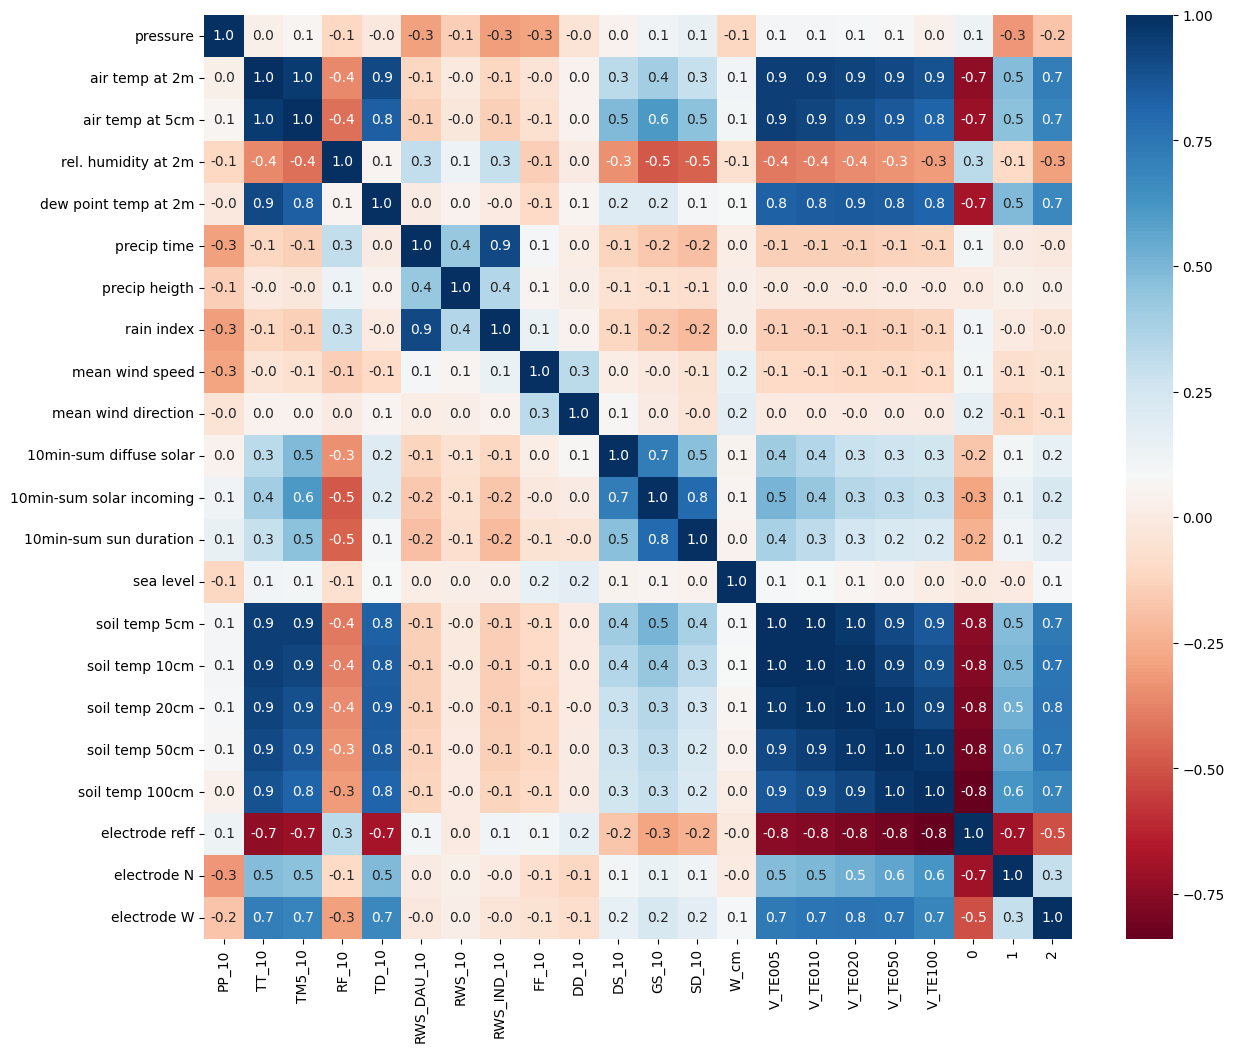

In [118]:
corr_total = total_merged_data.corr()

fig, ax = plt.subplots(1, figsize=(14,12))

sns.heatmap(corr_total, cmap="RdBu", yticklabels=labels,  annot=True, fmt='.1f',)

fig.savefig('Output/corr_matrix.pdf', dpi=300)

<Axes: xlabel='MESS_DATUM'>

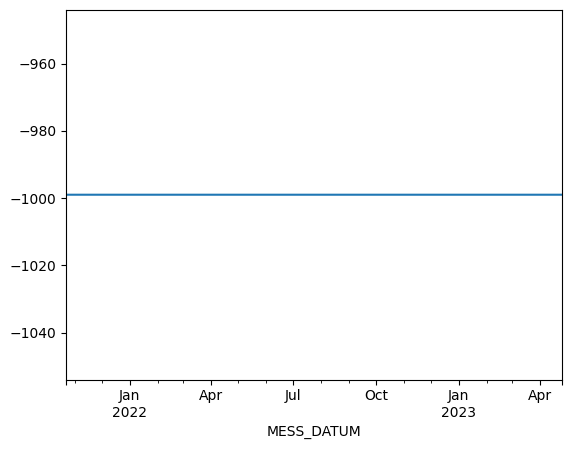

In [92]:
corr_total = total_merged_data.corr()

fig, ax = plt.subplots(1, figsize=(14,12))

sns.heatmap(corr_total, cmap="RdBu", yticklabels=labels,  annot=True, fmt='.1f', ax = ax)

#fig.savefig('Output/corr_matrix.pdf', dpi=300)

(19266.0, 19324.0)

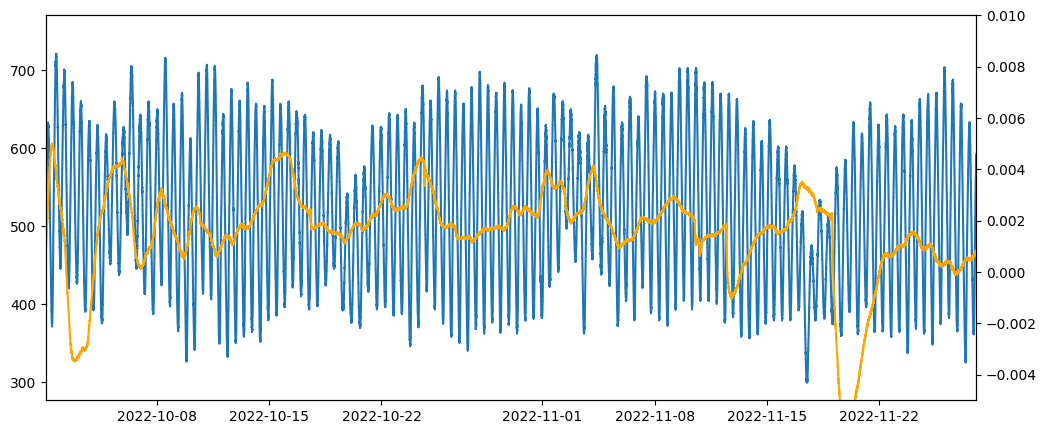

In [132]:
fig, ax = plt.subplots(1,figsize=(12,5))

ax.plot(Langeoog['W_cm'])

ax2 = ax.twinx()
ax2.plot(df_60s.iloc[:,2], color='orange')
ax2.set_ylim(-0.005, 0.01)

ax.set_xlim(np.datetime64('2022-10-01'), np.datetime64('2022-11-28'))